In [113]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import statistics

# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

df_covid19_cases_time= pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv")

ukraine_progress = df_covid19_cases_time[df_covid19_cases_time['Country_Region'] == 'Ukraine'].copy().drop(['FIPS','UID','iso3', 'Report_Date_String', 'People_Tested', 'People_Hospitalized', 'Province_State', 'Recovered', 'Active', 'Delta_Recovered'],axis =1)
ukraine_progress.index = ukraine_progress['Country_Region']
ukraine_progress = ukraine_progress.drop(['Country_Region'], axis=1)

# periods dynamically calculated
dates = pd.date_range(datetime.today() - timedelta(days=1), end="1/22/20", periods=15).format(formatter=lambda x: x.strftime('%#m/%#d/%y'))

uk_data_to_display = ukraine_progress[ukraine_progress['Last_Update'].isin(dates)]


In [41]:
df_uk = pd.DataFrame({'Last_Update':uk_data_to_display["Last_Update"],'Confirmed':uk_data_to_display["Confirmed"]})
df_uk.iplot(kind='bar',x='Last_Update',y='Confirmed')

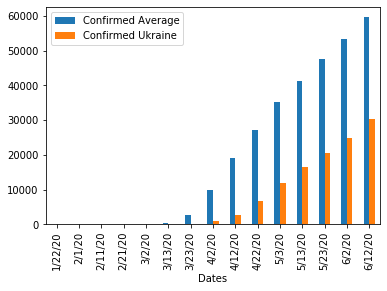

In [229]:
medical_rating = pd.read_csv("data/medical_system.csv")

top_50_medical_countries =  medical_rating.copy().drop(['Health Distribution','Overall goal attainment', 'Health expenditure per capita in international dollars', 'On level of health', 'Overall health system performance'],axis =1)

top_50_medical_countries.index = top_50_medical_countries["Country"]

top_50_medical_countries = top_50_medical_countries.drop(['Country'], axis=1).sort_values('Health Level').head(50)

all_countries_cases = df_covid19_cases_time.copy().drop(['FIPS','UID','iso3', 'Report_Date_String', 'People_Tested', 'People_Hospitalized', 'Province_State', 'Recovered', 'Active', 'Delta_Recovered'],axis =1)
all_countries_cases.index = all_countries_cases['Country_Region']
all_countries_cases = all_countries_cases.drop(['Country_Region'], axis=1)

top_50_medical_countries = pd.merge(top_50_medical_countries, all_countries_cases, left_index=True, right_index=True)

average_confirmed_data=[]

for indx, date in enumerate(dates):
    date_slice = top_50_medical_countries[top_50_medical_countries["Last_Update"] == date]["Confirmed"]
    average = sum(date_slice) / len(date_slice)
    average_confirmed_data.append(round(average))

average_confirmed_data = average_confirmed_data[::-1]

uk_average_data_to_display = uk_data_to_display.copy().drop(['Deaths', 'Incident_Rate', 'Last_Update', 'Delta_Confirmed'], axis=1)

df1 = pd.DataFrame(average_confirmed_data, columns=['Confirmed'])
df2 = pd.DataFrame(uk_average_data_to_display, columns=['Confirmed'])

df1['Dates'] = dates[::-1]
df2['Dates'] = dates[::-1]

mergedStuff = pd.merge(df1, df2, on=['Dates'], how='inner').rename(columns={"Confirmed_x": "Confirmed Average", "Confirmed_y": "Confirmed Ukraine"})

mergedStuff.head(20).plot(kind='bar', x='Dates')

